In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

import math
from typing import List

import matplotlib.pyplot as plt
import torch
from torch.distributions import Uniform
from torch.nn import Module
from torch.nn.functional import cross_entropy, relu
from torch.nn.parameter import Parameter
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

from utils import load_dataset, problem


c:\Users\raman\.conda\envs\cse446\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# Generate sample data
X = np.array([[1, 2], [1, 3], [2, 3], [3, 4], [0, 0.5], [1, 0], [2,1], [3,0]])
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])

# Fit the SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Get support vectors
support_vectors = clf.support_vectors_

print(f'support vectors are {support_vectors}')

print(f'number of support vectors for each class are {clf.n_support_}')

print(f'class weight for each class are {clf.class_weight_}')
print(f'coef  for each class are {clf.coef_}')
print(f'intercept   are {clf.intercept_}')


support vectors are [[0.  0.5]
 [2.  1. ]
 [1.  2. ]]
number of support vectors for each class are [2 1]
class weight for each class are [1. 1.]
coef  for each class are [[-0.29411765  1.17647059]]
intercept   are [-1.58823529]


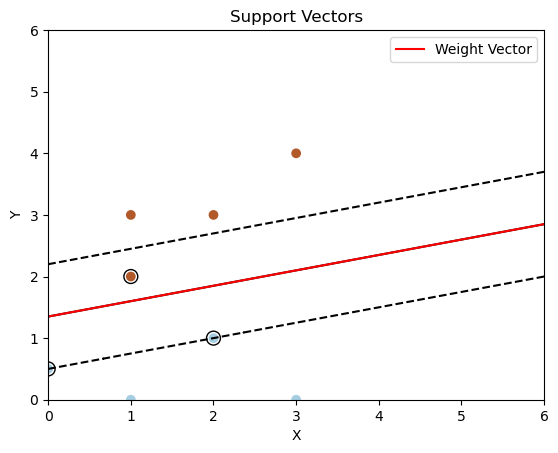

In [12]:
# Get the coefficients of the support vectors
coefficients = clf.coef_[0]

# Compute the slope and intercept of the weight vector line
slope = -coefficients[0] / coefficients[1]
intercept = -clf.intercept_[0] / coefficients[1]

# Compute the x values for the weight vector line
x_values = np.linspace(0, 6, 100)
y_values = slope * x_values + intercept

# Plot the data points and support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=100, facecolors='none', edgecolors='k')
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'],
            colors='k')

# Plot the weight vector line
plt.plot(x_values, y_values, 'r-', label='Weight Vector')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Support Vectors')
plt.legend()
plt.show()


In [13]:
# Get the coefficients of the support vectors
coefficients = clf.coef_[0]

# Compute the slope and intercept of the decision boundary line
slope_db = -coefficients[0] / coefficients[1]
intercept_db = -clf.intercept_[0] / coefficients[1]

# Compute the slope and intercept of the weight vector line
slope_wv = -coefficients[0] / coefficients[1]
intercept_wv = -clf.intercept_[0] / coefficients[1]

# Print the equations
print("Decision Boundary Line: y = {:.2f}x + {:.2f}".format(slope_db, intercept_db))
print("Weight Vector Line: y = {:.2f}x + {:.2f}".format(slope_wv, intercept_wv))


Decision Boundary Line: y = 0.25x + 1.35
Weight Vector Line: y = 0.25x + 1.35


In [17]:
from typing import Tuple, Union

import matplotlib.pyplot as plt
import numpy as np

from utils import load_dataset, problem

(x_30, y_30), (x_300, y_300), (x_1000, y_1000) = load_dataset("kernel_bootstrap")


print(x_30, '\n', y_30)

[0.60597828 0.73336936 0.13894716 0.31267308 0.99724328 0.12816238
 0.17899311 0.75292543 0.66216051 0.78431013 0.0968944  0.05857129
 0.96239599 0.61655744 0.08662996 0.56127236 0.61652471 0.96384302
 0.57430429 0.37116085 0.45214524 0.20185025 0.56930512 0.19509597
 0.58370402 0.47631347 0.5178144  0.82309863 0.73222503 0.06905627] 
 [ 2.96999113 -2.46326239  1.495858   -3.23103496 -1.34583481  0.84580786
  1.92630364 -1.36369138 -0.03825651  0.35135182 -0.20615318  2.2559053
  1.29177782  5.04201292  1.17550653  2.56812973  2.2548283  -1.12211684
  3.16031217 -3.76339403 -3.98235071  1.1722706   5.02891128  2.50457333
  3.4084922  -1.9511458  -0.6181052   2.45072534 -1.479382    2.17215129]


In [ ]:
(x, y), (x_test, y_test) = load_dataset("mnist")
    x = torch.from_numpy(x).float()
    y = torch.from_numpy(y).long()
    x_test = torch.from_numpy(x_test).float()
    y_test = torch.from_numpy(y_test).long()